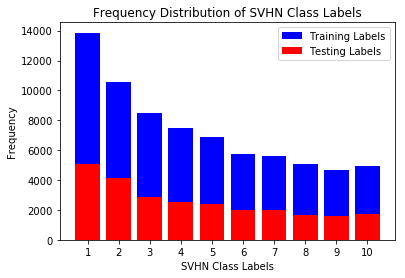

73257 Images with 32 x 32 RGB grid


In [1]:
import tensorflow as tf 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

"""
Extracting Training and Testing Data from .mat Files
"""
X_train = scipy.io.loadmat('train_32x32.mat')['X']
Y_train = scipy.io.loadmat('train_32x32.mat')['y']
X_test = scipy.io.loadmat('test_32x32.mat')['X']
Y_test = scipy.io.loadmat('test_32x32.mat')['y']
shape_train = X_train.shape
shape_test = X_test.shape

"""
Plotting Class Labels against their respective frequencies in a Bar Graph
"""
tmp_labels = Y_train.reshape(73257).tolist()
tmp_labels = dict(Counter(tmp_labels))
plt.bar(range(len(tmp_labels)), tmp_labels.values(), align='center', color='blue', label='Training Labels')
plt.xticks(range(len(tmp_labels)), tmp_labels.keys())
tmp_labels = Y_test.reshape(26032).tolist()
tmp_labels = dict(Counter(tmp_labels))
plt.bar(range(len(tmp_labels)), tmp_labels.values(), align='center', color='red', label='Testing Labels')
plt.legend()
plt.xlabel('SVHN Class Labels')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of SVHN Class Labels')
plt.show()


print shape_train[3], "Images with", shape_train[0], "x", shape_train[0], "RGB grid"

In [2]:
def reformat(data, Y):
    train = []
    trainLen = data.shape[3]
    for x in xrange(trainLen):
        train.append(data[:,:,:,x])
    train = np.asarray(train)
    Ytr=[]
    for el in Y:
        tmp=np.zeros(10)
        if el==10:
            tmp[0]=1
        elif el==1:
            tmp[1]=1
        elif el==2:
            tmp[2]=1
        elif el==3:
            tmp[3]=1
        elif el==4:
            tmp[4]=1
        elif el==5:
            tmp[5]=1
        elif el==6:
            tmp[6]=1
        elif el==7:
            tmp[7]=1
        elif el==8:
            tmp[8]=1
        elif el==9:
            tmp[9]=1
        Ytr.append(tmp)
    return train, np.asarray(Ytr)

In [3]:
X_train = X_train.astype('float32') / 2048.0 - 1
X_test = X_test.astype('float32') / 2048.0 - 1

In [4]:
X_train, Y_train = reformat(X_train, Y_train)
X_test, Y_test = reformat(X_test, Y_test)

In [5]:
x_reshape_train = X_train.reshape(73257,-1)
x_reshape_test = X_test.reshape(26032,-1)

In [6]:
learning_rate = 0.001 # changed learning rate from .5 to .001
training_epochs = 150
display_step = 1

# Network Parameters
n_hidden_1 = 128 # changed hidden from 100 to 128, 1st layer number of features
width = 32
height = 32
n_input = 3072 # changed input from 2 to 3, MNIST data input (img shape: 28*28)
n_classes = 10 # changed classes to 10 from 3, MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float32", shape = (None, n_input))
y = tf.placeholder("float32", shape = (None, n_classes))


In [7]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    #type(x)
    #print y.shape
    print weights['h1']
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.maximum(0.1 * layer_1, layer_1)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    print out_layer
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}



In [8]:
# Construct model
#pred = multilayer_perceptron(x, weights, biases)
print weights['h1']
pred = multilayer_perceptron(x=x, weights=weights, biases=biases)

Tensor("add:0", shape=(?, 10), dtype=float32)


In [9]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

In [10]:
# Launch the graph

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    # Loop over all batches
    #batch_x, batch_y = mnist.train.next_batch(batch_size)
    # Run optimization op (backprop) and cost op (to get loss value)
    _, c = sess.run([optimizer, cost],feed_dict={x: x_reshape_train, y: Y_train})
    #_, c = sess.run([optimizer, cost], feed_dict={x: X_train, y_: y_train})
    # Compute average loss
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", \
            "{:.9f}".format(c))
print("Optimization Finished!")

# Test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("Accuracy:", accuracy.eval({x: x_reshape_test, y: Y_test},session=sess))

('Epoch:', '0001', 'cost=', '319.080291748')
('Epoch:', '0002', 'cost=', '191.228805542')
('Epoch:', '0003', 'cost=', '222.815505981')
('Epoch:', '0004', 'cost=', '133.971389771')
('Epoch:', '0005', 'cost=', '84.511558533')
('Epoch:', '0006', 'cost=', '108.835243225')
('Epoch:', '0007', 'cost=', '108.367668152')
('Epoch:', '0008', 'cost=', '102.614883423')
('Epoch:', '0009', 'cost=', '104.840187073')
('Epoch:', '0010', 'cost=', '87.272125244')
('Epoch:', '0011', 'cost=', '105.850242615')
('Epoch:', '0012', 'cost=', '99.771316528')
('Epoch:', '0013', 'cost=', '62.818195343')
('Epoch:', '0014', 'cost=', '60.973987579')
('Epoch:', '0015', 'cost=', '71.659896851')
('Epoch:', '0016', 'cost=', '101.823554993')
('Epoch:', '0017', 'cost=', '114.696014404')
('Epoch:', '0018', 'cost=', '96.419113159')
('Epoch:', '0019', 'cost=', '88.209075928')
('Epoch:', '0020', 'cost=', '88.183685303')
('Epoch:', '0021', 'cost=', '84.316802979')
('Epoch:', '0022', 'cost=', '107.773651123')
('Epoch:', '0023', '